**Step 1:Importing Neccessary libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

**Step 2:Loading the Data from the Dataset**

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train_data_dir = '/content/drive/MyDrive/art_dataset/training_set'
valid_data_dir = '/content/drive/MyDrive/art_dataset/validation_set'

**Step 3:Data Preprocessing**

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 7720 images belonging to 5 classes.
Found 856 images belonging to 5 classes.


**Model 1:Sequential Model**

**Creating the Model**

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

**Compiling & Training the Model**

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/20
50/50 [==============================] - ETA: 0s - loss: 0.9179 - accuracy: 0.6650 

50/50 [==============================] - 948s 19s/step - loss: 0.9179 - accuracy: 0.6650 - val_loss: 0.6740 - val_accuracy: 0.7827
Epoch 2/20
50/50 [==============================] - 456s 9s/step - loss: 0.7133 - accuracy: 0.7475
Epoch 3/20
50/50 [==============================] - 369s 7s/step - loss: 0.6999 - accuracy: 0.7550
Epoch 4/20
50/50 [==============================] - 306s 6s/step - loss: 0.6617 - accuracy: 0.7650
Epoch 5/20
46/50 [==========================>...] - ETA: 17s - loss: 0.6028 - accuracy: 0.7928

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


50/50 [==============================] - 228s 4s/step - loss: 0.6102 - accuracy: 0.7900
Epoch 6/20
50/50 [==============================] - 209s 4s/step - loss: 0.5750 - accuracy: 0.8037
Epoch 7/20
50/50 [==============================] - 201s 4s/step - loss: 0.5633 - accuracy: 0.7987
Epoch 8/20
50/50 [==============================] - 206s 4s/step - loss: 0.5515 - accuracy: 0.8156
Epoch 9/20
50/50 [==============================] - 203s 4s/step - loss: 0.4543 - accuracy: 0.8425
Epoch 10/20
50/50 [==============================] - 199s 4s/step - loss: 0.4413 - accuracy: 0.8450
Epoch 11/20
50/50 [==============================] - 212s 4s/step - loss: 0.4742 - accuracy: 0.8381
Epoch 12/20
50/50 [==============================] - 200s 4s/step - loss: 0.4237 - accuracy: 0.8512
Epoch 13/20
50/50 [==============================] - 194s 4s/step - loss: 0.3921 - accuracy: 0.8610
Epoch 14/20
50/50 [==============================] - 207s 4s/step - loss: 0.3990 - accuracy: 0.8581
Epoch 15/20
50/5

**Evaluation of Model and Plot**

In [27]:
accuracy = model.evaluate(validation_generator, steps=50)[1]
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

27/50 [===============>..............] - ETA: 56s - loss: 0.5028 - accuracy: 0.8119 

50/50 [==============================] - 65s 1s/step - loss: 0.5028 - accuracy: 0.8119
Validation Accuracy: 81.19%


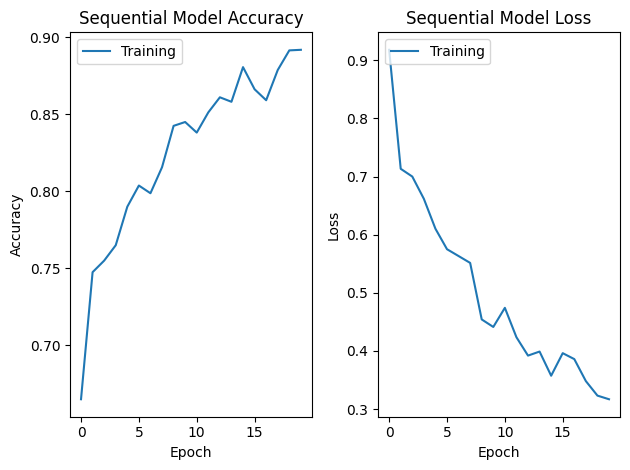

In [38]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Sequential Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Sequential Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [47]:
from sklearn.datasets import load_files
import numpy as np

test_dir = valid_data_dir

#function to load the dataset
def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

x_test, y_test,target_labels = load_dataset(test_dir)

In [55]:
from keras.utils import to_categorical

no_of_classes = 5

# Convert labels to one-hot encoded format
y_test = to_categorical(y_test, no_of_classes)

In [59]:
def convert_image_to_array(image):
   def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array
    return processed_image_array

# Apply the conversion to all images in x_test
x_test = [convert_image_to_array(image) for image in x_test]

# Convert the list of processed images to a NumPy array
x_test = np.array(x_test)
print('Test set shape : ',x_test.shape)

Test set shape :  (856,)


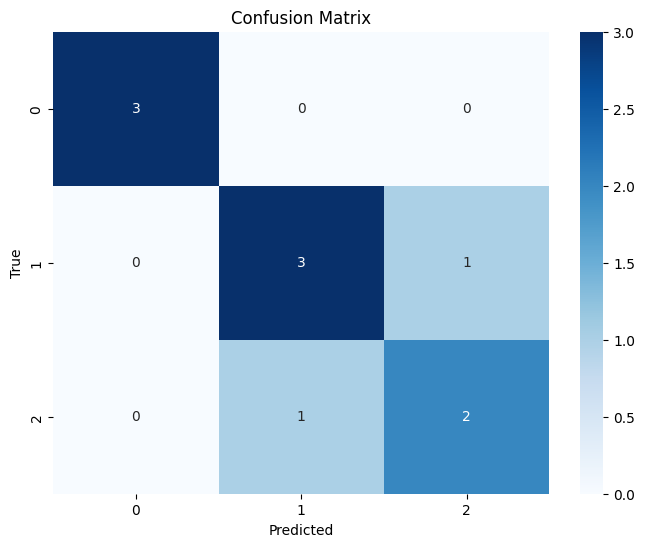

In [60]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
